# Predicción de la calidad del vino usando un preprocesamiento previo

---

1. Carga de los datos y visualización de los datos
2. Balancear los datos
3. Correlaciones entre atributos
4. Escalamiento
5. KNN Classifier
6. Guardado del modelo
7. KNN Regressor
8. Informe de clasificación
9. Pruebas
10. OPCIONAL: Importación de modelos y API Flask

---

In [ ]:
# Importar librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import sklearn
import pickle
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1. Carga de los datos y visualización de los datos

Primero descargamaos el dataset y lo movemos al directorio `content` para trabajar con él.

In [ ]:
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

!mv /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2/winequality-red.csv /content/winequality-red.csv

100%|██████████| 25.6k/25.6k [00:00<00:00, 21.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2


Hacemos una visualización de los datos.

In [ ]:
df_wines = pd.read_csv("/content/winequality-red.csv")
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_features_columns = df_wines.columns.to_list()
wine_features_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


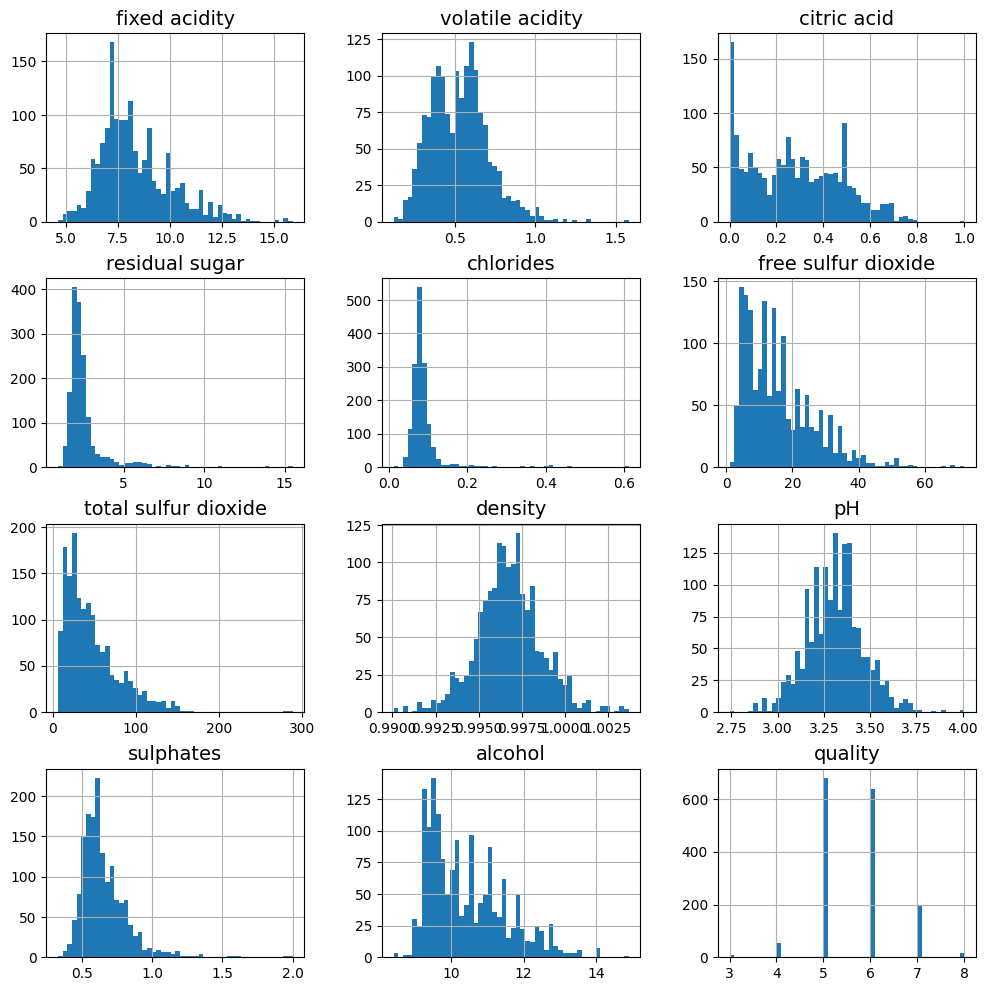

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_wines.hist(bins=50, figsize=(12, 12))
plt.show()

Si nos fijamos atentamente en el objetivo `quality`, veremos que está desbalanceado pues hay muy pocos vinos de 3 y 8. Esto hace que nuestro modelo no pueda predecir correctamente y tienda ha favorecer aquellos valores con más cantidad (como el 5 y el 6).

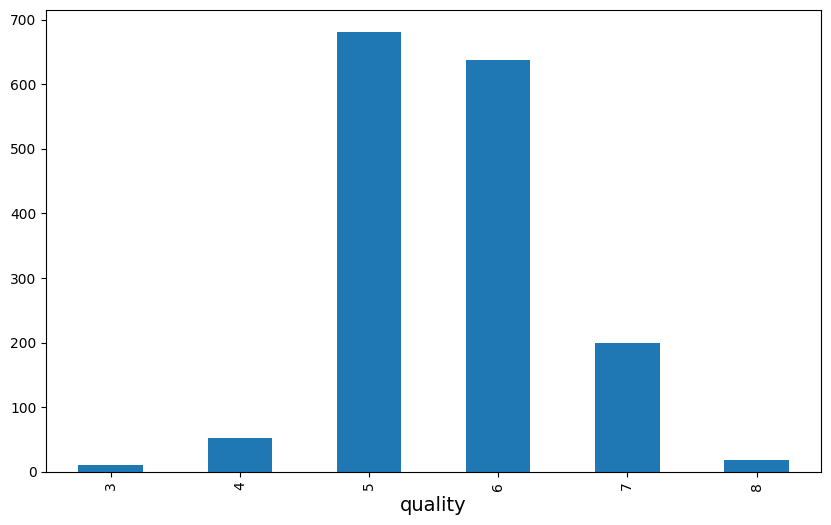

In [ ]:
plt.figure(figsize=(10, 6))
df_wines["quality"].value_counts().sort_index().plot(kind="bar")
plt.show()

### 2. Balancear los datos

Separamos los datos, debemos hacerlo antes para evitar la fuga de datos.

In [ ]:
X = df_wines.drop('quality', axis=1)
y = df_wines['quality']

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.2, random_state=42)

La solución ha esto es **sobremuestrear** los datos, es decir, agregar datos sintéticos para balancear el dataset. Para hacerlo hemos usado `SMOTE` de `imblearn`.

In [ ]:
smote = SMOTE(random_state=42)
df_wines_resampled, df_wines_labels_resampled = smote.fit_resample(X_train_wine, y_train_wine)

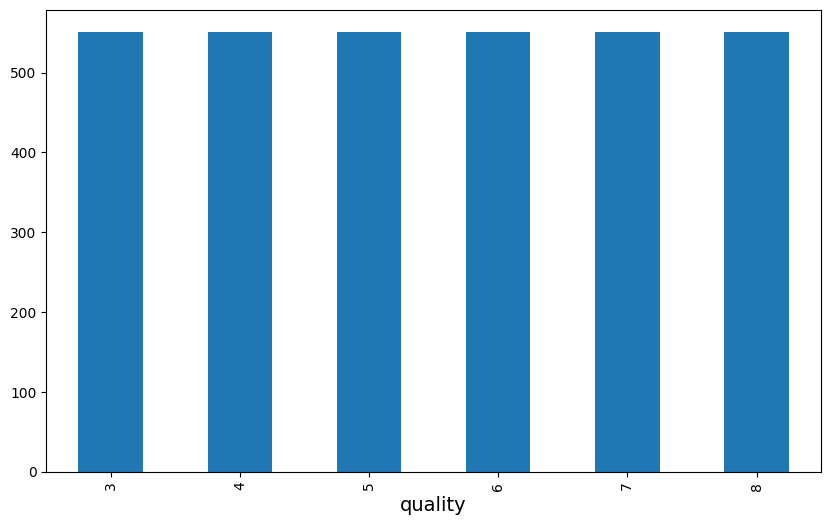

In [ ]:
plt.figure(figsize=(10, 6))
df_wines_labels_resampled.value_counts().sort_index().plot(kind="bar")
plt.show()

Como podemos apreciar, el dataset ha sido balanceado con éxito. Ahora ninguna clase estará favorecida.

### 3. Correlaciones entre atributos

Ahora veremos las correlaciones que existen entre los distintos atributos del dataset. Al haber balanceado los datos, es seguro que los valores han cambiado y no sean los mismos de la práctica anterior.

In [ ]:
new_df_wines = pd.concat([df_wines_resampled, df_wines_labels_resampled], axis=1)

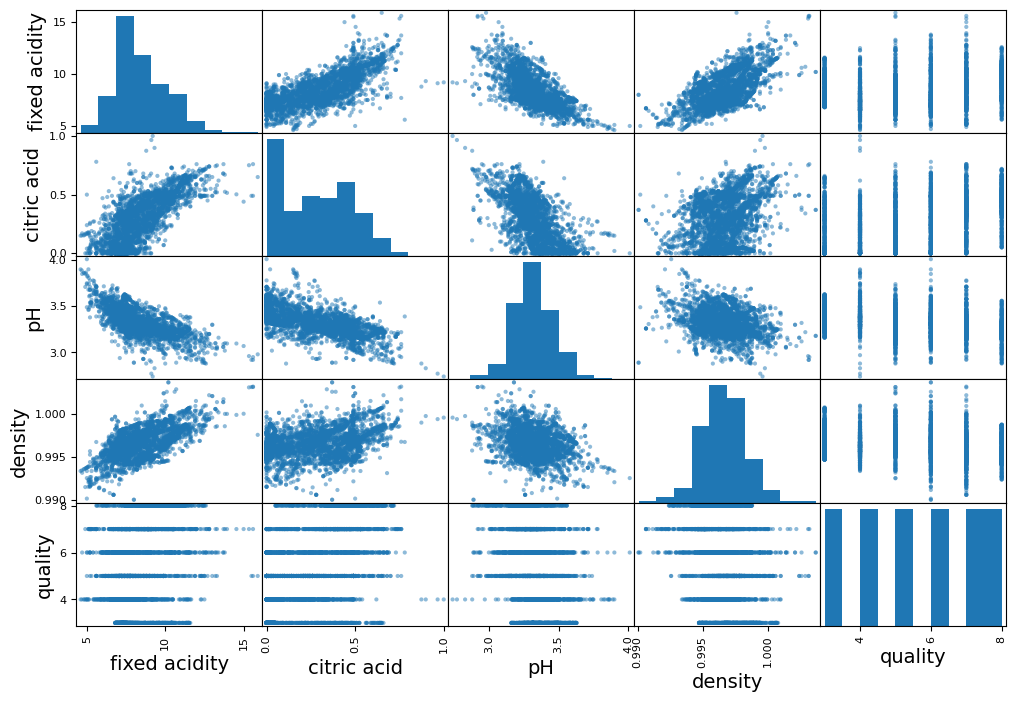

In [ ]:
attributes = ["fixed acidity", "citric acid", "pH", "density",
              "quality"]
scatter_matrix(new_df_wines[attributes], figsize=(12, 8))
plt.show()

Vemos que `fixed acidity` y `citric acid` tienen bastante correlación. También `fixed acidity` y `pH` muestran una alta correlación negativa, abajo se ha ampliado este gráfico.

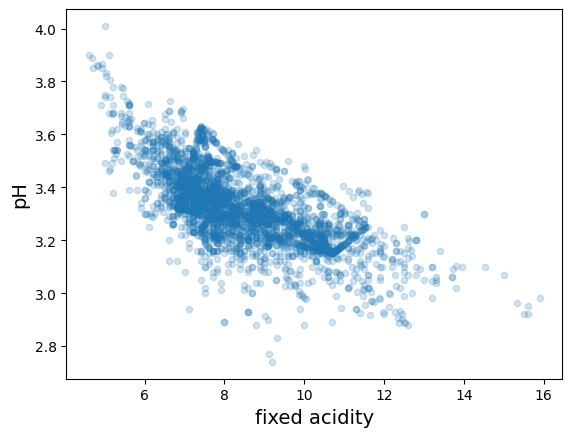

In [ ]:
new_df_wines.plot(kind="scatter", x="fixed acidity", y="pH", alpha=0.2)
plt.show()

Y no es de extrañar, si miramos la tabla de correlaciones podemos ver reflejadas estas altas correlaciones con las gráficas anteriores.

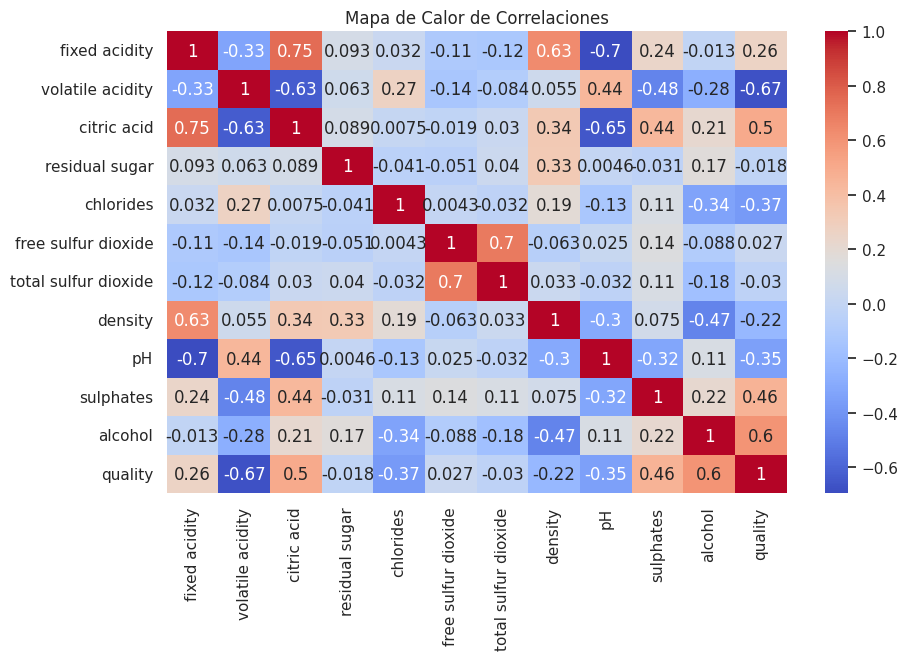

In [ ]:
plt.figure(figsize=(10, 6))
sns.set()
sns.heatmap(new_df_wines.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### 4. Escalando los datos

Para solucionar el problema de los outliers, debemos escalar los datos.

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(df_wines_resampled, df_wines_labels_resampled, test_size=0.2, random_state=42)

In [ ]:
std_scaler = StandardScaler()
X_train_wines_std = std_scaler.fit_transform(X_train_res)
X_test_wines_std = std_scaler.transform(X_test_res)

In [ ]:
X_train_wines_std

array([[-1.01872965, -0.02417654, -1.38505348, ...,  0.76314089,
        -0.62222922,  0.43560196],
       [ 0.22476002, -0.65823974,  0.73989271, ..., -0.15925538,
         0.22451561,  1.15046515],
       [ 1.53133647,  0.06255728,  1.71887189, ..., -0.68767962,
         0.23164603,  2.21063756],
       ...,
       [-0.72839003,  2.13388808, -1.2192502 , ...,  0.78232701,
        -1.13872913, -0.25500578],
       [-0.58047245,  0.43894951, -1.03989627, ...,  0.41406801,
        -0.68736343,  0.16680034],
       [ 1.34077033, -0.70636841,  1.12527014, ..., -0.65190823,
         0.84375927,  1.88259863]])

In [ ]:
scaler = joblib.dump(std_scaler, 'scaler.pkl')

### 5. KNN de Clasificación

Para seleccionar el mejor modelo de KNN debemos hacer validación cruzada. Hemos modificado la función que hacía validación cruzada manual y la hemos sustituido por la versión de `skit-learn`.

Max Value uniform: 0.8502 (k=1)
Max Value distance: 0.8502 (k=1)


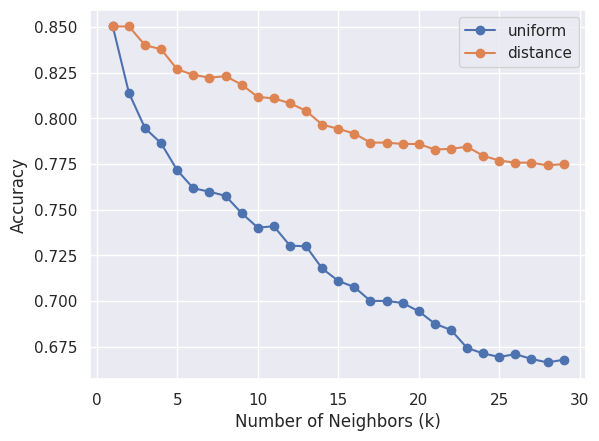

In [ ]:
def cross_validation(neighbors, splits, features, target):
    """
    Realiza validación cruzada con K-Vecinos más Cercanos usando cross_val_score.

    Parámetros:
    - neighbors: int, número máximo de vecinos (k) a evaluar.
    - splits: int, número de divisiones (folds) en la validación cruzada.
    - features: DataFrame, conjunto de datos de entrenamiento.
    - target: DataFrame, conjunto de datos de prueba.

    Retorna:
    - None
    """

    X = features
    y = target

    for weights in ('uniform', 'distance'):
        total_scores = []

        for k in range(1, neighbors):
            knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
            scores = cross_val_score(knn, X, y, cv=splits, scoring='accuracy')
            total_scores.append(np.mean(scores))

        plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
        print(f'Max Value {weights}: {max(total_scores):.4f} (k={np.argmax(total_scores) + 1})')

    plt.ylabel('Accuracy')
    plt.xlabel('Number of Neighbors (k)')
    plt.legend()
    plt.show()

cross_validation(neighbors=30, splits=5, features=X_train_wines_std, target=y_train_res)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn_classifier.fit(X_train_wines_std, y_train_res)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
y_pred_wine = knn_classifier.predict(std_scaler.transform(X_test_wine))
print(classification_report(y_test_wine, y_pred_wine))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.30      0.16        10
           5       0.76      0.57      0.65       130
           6       0.62      0.52      0.57       132
           7       0.43      0.64      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.32      0.34      0.32       320
weighted avg       0.62      0.54      0.57       320



Luego tras entrenar el modelo, miramos la matriz de confusión.

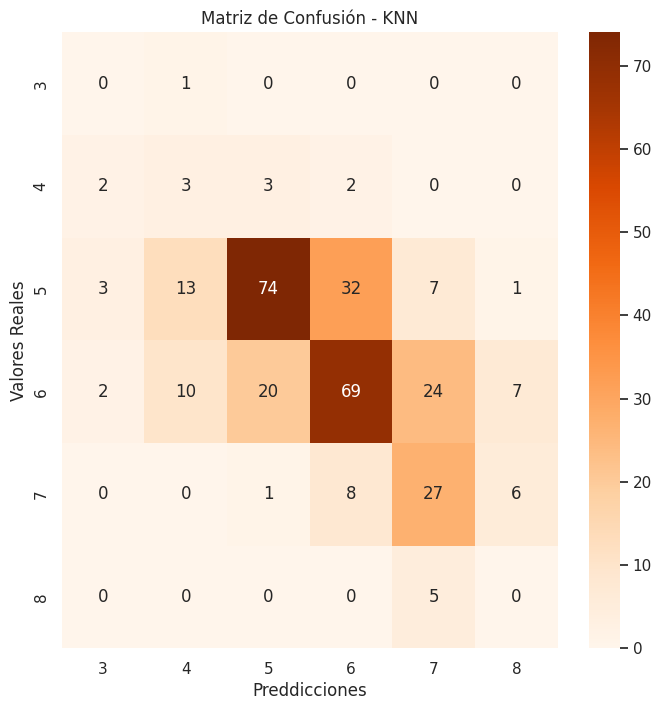

In [ ]:
cm_knn_classifier = confusion_matrix(y_test_wine, y_pred_wine)

DF_COLUMNS = sorted(new_df_wines['quality'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_knn_classifier, annot=True, fmt='d', cmap='Oranges', xticklabels=DF_COLUMNS, yticklabels=DF_COLUMNS)
plt.xlabel('Preddicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - KNN')
plt.show()

Podemos notar que los resultados son bastantes mejores que los obtenidos en la práctica anterior gracias al balanceo y preprocesamiento de los datos.

### 6. Guardando el modelo

Guardamos el modelo con `pickle`.

In [ ]:
filename = 'knn_classifier_model.pkl'
pickle.dump(knn_classifier, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to knn_classifier_model.pkl


```python
loaded_model = pickle.load(open('knn_classifier_model.pkl', 'rb'))
```

### 7. KNN de Regresión

Hacemos el mismo proceso con el KNN de regresión.

Min Value (uniform): 0.2939628444177121 (k=2)
Min Value (distance): 0.2611671737563044 (k=3)


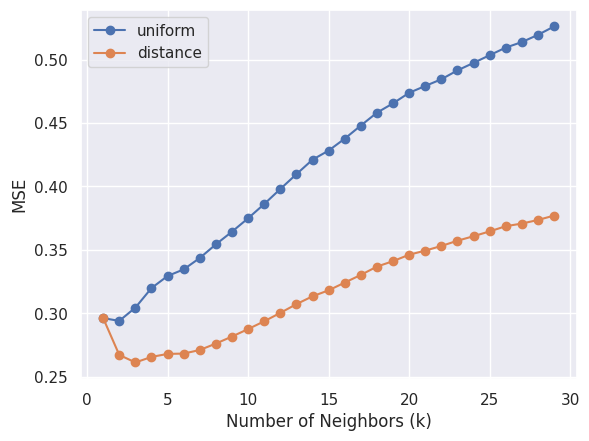

In [ ]:
def cross_validation_regression_lib(neighbors, splits, features, target):
    """
    Realiza validación cruzada con K-Vecinos más Cercanos utilizando cross_val_score.

    Parámetros:
    - neighbors: int, número máximo de vecinos (k) a evaluar.
    - splits: int, número de divisiones (folds) en la validación cruzada.
    - features: DataFrame, conjunto de datos de características.
    - target: DataFrame, conjunto de datos de objetivo.

    Retorna:
    - None
    """
    X = features
    y = target

    for weights in ('uniform', 'distance'):
        total_scores = []
        for k in range(1, neighbors):
            knn = KNeighborsRegressor(n_neighbors=k, weights=weights)
            mse_scores = -cross_val_score(knn, X, y, cv=splits, scoring='neg_mean_squared_error')
            total_scores.append(np.mean(mse_scores))

        plt.plot(range(1, neighbors), total_scores, marker='o', label=weights)
        print(f'Min Value ({weights}): {min(total_scores)} (k={np.argmin(total_scores) + 1})')

    plt.ylabel('MSE')
    plt.xlabel('Number of Neighbors (k)')
    plt.legend()
    plt.show()

cross_validation_regression_lib(neighbors=30, splits=5, features=X_train_wines_std, target=y_train_res)

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_regressor.fit(X_train_wines_std, y_train_res)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [ ]:
y_pred_regressor = knn_regressor.predict(std_scaler.transform(X_test_wine))

print(f"Mean Squared Error: {mean_squared_error(y_test_wine, y_pred_regressor)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_wine, y_pred_regressor)}")
print(f"R^2 Score: {r2_score(y_test_wine, y_pred_regressor)}")

Mean Squared Error: 0.6525281551991892
Mean Absolute Error: 0.5333948316869233
R^2 Score: 0.0014960909099512865


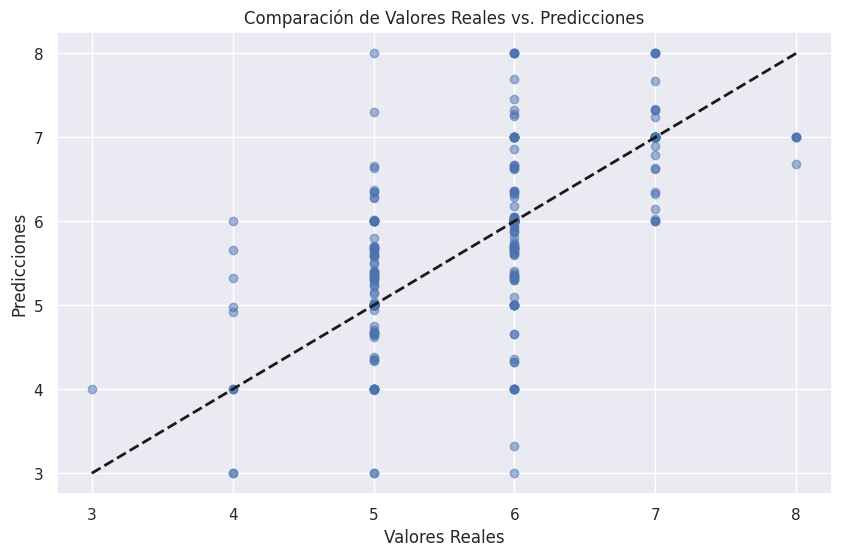

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_wine, y_pred_regressor, alpha=0.5)
plt.plot([y_test_wine.min(), y_test_wine.max()], [y_test_wine.min(), y_test_wine.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.show()

In [ ]:
filename = 'knn_regressor_model.pkl'
pickle.dump(knn_regressor, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to knn_regressor_model.pkl


```python
loaded_model = pickle.load(open('knn_regressor_model.pkl', 'rb'))
```

### 8. Informe de clasificación

Sin embargo, para comparar ambos modelos debemos ajustar los resultados del modelo de regresión pasando sus resultados a enteros. De esta forma podemos hacer una matriz de confusión y hacer una comparación justa con el modelo de clasificación.

In [ ]:
print(classification_report(y_test_wine, np.round(y_pred_regressor)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.30      0.16        10
           5       0.77      0.61      0.68       130
           6       0.65      0.55      0.60       132
           7       0.51      0.71      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.34      0.36      0.34       320
weighted avg       0.65      0.58      0.60       320



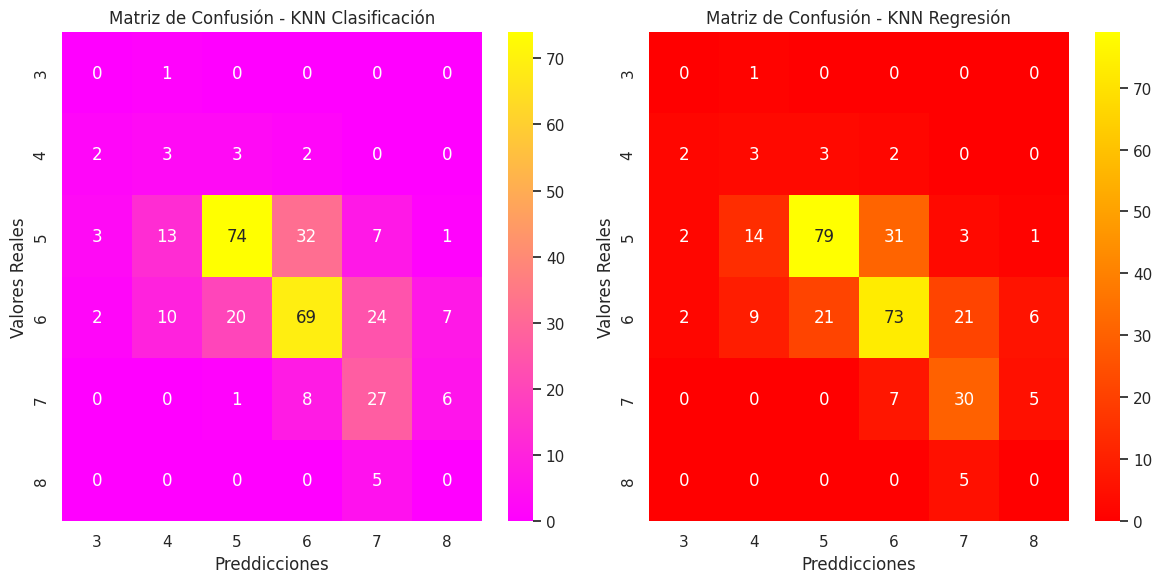

In [ ]:
cm_knn_classifier = confusion_matrix(y_test_wine, y_pred_wine)
cm_knn_regressor = confusion_matrix(y_test_wine, np.round(y_pred_regressor))

DF_COLUMNS = sorted(new_df_wines['quality'].unique())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn_classifier, annot=True, fmt='d', cmap='spring', xticklabels=DF_COLUMNS, yticklabels=DF_COLUMNS)
plt.xlabel('Preddicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - KNN Clasificación')

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn_regressor, annot=True, fmt='d', cmap='autumn', xticklabels=DF_COLUMNS, yticklabels=DF_COLUMNS)
plt.xlabel('Preddicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - KNN Regresión')

plt.tight_layout()
plt.show()

### 9. Pruebas

Por último, hemos desarrollado un programa que pregunta al usuario por los valores del vino, pasa los valores a la API de Flask (explicada abajo) y devuelve las predicciones de los modelos.


```python
import requests

URL = 'http://127.0.0.1:5000/calcular-calidad'

headers = {"Content-Type": "application/json"}

wine_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
             'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

try:
    features = {}
    # Solicita los valores de los atributos del vino al usuario
    for feature in wine_cols:
        value = float(input(f"Ingrese el valor de {feature}: "))
        features.update({feature: value})  # Agregar el valor al diccionario de características

    print("="*35)

    response = requests.post(URL, json=features, headers=headers)

    predicctions = response.json()

    for key, value in predicctions.items():
        print(f"{key}: {value}")

except Exception as e:
    print(f"Ocurrió un error durante la predicción: {e}")

```

### Opcional: Importación de modelos y API de flask

Luego como parte opcional hemos hecho una importación de los modelos y que luego sean utilizados en una API de flask. Esta librería permite crear un servidor web usando Python. Tenemos la siguiente estructura:

```
wine_detecter # Directorio del proyecto
|
|______ flaskr # Directorio de flaskr
|
|______ models # Directorio de los modelos
|
|______ public # Directorio de la página normal
|       |
|       |______ js
|       |
|       |______ css
|
|
|______ scalers # Directorio de escaladores
|
|______ venv # Directorio de python
```



En la carpeta de `flaskr` tenemos el archivo `__init__.py` que es el siguiente:

```python
import os

from flask import Flask, request, jsonify
from flask_cors import CORS
import pickle
import joblib
import numpy as np
import warnings

def create_app(test_config=None):
    # create and configure the app
    app = Flask(__name__, instance_relative_config=True)
    CORS(app)
    app.config.from_mapping(
        SECRET_KEY='dev',
        DATABASE=os.path.join(app.instance_path, 'flaskr.sqlite'),
    )

    if test_config is None:
        # load the instance config, if it exists, when not testing
        app.config.from_pyfile('config.py', silent=True)
    else:
        # load the test config if passed in
        app.config.from_mapping(test_config)

    # ensure the instance folder exists
    try:
        os.makedirs(app.instance_path)
    except OSError:
        pass

    @app.route('/calcular-calidad', methods=['POST'])
    def calcular_calidad():

        # Cargar el modelo entrenado (debes tener el archivo .pkl con el modelo previamente entrenado)
        knn_classifier = pickle.load(open('./models/knn_classifier_model.pkl', 'rb'))
        knn_regressor = pickle.load(open('./models/knn_regressor_model.pkl', 'rb'))  
        scaler = joblib.load('./scalers/scaler.pkl')

        if request.is_json:
            # Obtener los datos del vino en formato JSON desde la solicitud
            data = request.get_json()
        else:
            # Obtener los datos del vino en formato FormData desde la solicitud
            data = request.form

        features = [
            float(data['fixed_acidity']),
            float(data['volatile_acidity']),
            float(data['citric_acid']),
            float(data['residual_sugar']),
            float(data['chlorides']),
            float(data['free_sulfur_dioxide']),
            float(data['total_sulfur_dioxide']),
            float(data['density']),
            float(data['pH']),
            float(data['sulphates']),
            float(data['alcohol'])
        ]
        # Convertir la lista de características a un array para pasar al modelo
        features_array = np.array(features).reshape(1, -1)
        features_array_std = scaler.transform(features_array)

        # Predecir la calidad del vino
        calidad_knn_cl = int(knn_classifier.predict(features_array_std)[0])
        calidad_knn_rg = np.round(knn_regressor.predict(features_array_std)[0])

        # Devolver la calidad como un JSON
        return jsonify({
            'calidad_knn_cl': calidad_knn_cl,
            'calidad_knn_rg': calidad_knn_rg
        })

    return app
```



La función `calcular_calidad` importará los modelos KNN con `pickle` y recogerá los valores del formulario y los convertirá `float` para pasarlos luego a los modelos. Sus predicciones se guardarán en un `JSON` y se devolverán a la página principal. Para iniciar nuestro servidor flask debemos ejecutar el siguiente comando:

```
flask --app flaskr run --debug
```

Este comando iniciará un servidor en el puerto 5000 (hay que ejecutar este comando en el entorno virtual de python), lo siguiente será en nuestra página principal que está en `public` en la que tenemos lo siguiente:



```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predicción de Vinos</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-QWTKZyjpPEjISv5WaRU9OFeRpok6YctnYmDr5pNlyT2bRjXh0JMhjY6hW+ALEwIH" crossorigin="anonymous">
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-YvpcrYf0tY3lHB60NNkmXc5s9fDVZLESaAA55NDzOxhy9GkcIdslK1eN7N6jIeHz" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
    <link rel="stylesheet" href="./css/index.css">
    <script src="./js/main.js"></script>
</head>
<body>
    <h1>Wine Quality Detecter</h1>
    <div class="content">
        <form id="wine-form" action="" method="POST">
            <div>
                <label for="fixed_acidity">Fixed Acidity:</label>
                <input type="number" id="fixed_acidity" name="fixed_acidity" step="any" required /><br>
            </div>
    
            <div>
                <label for="volatile_acidity">Volatile Acidity:</label>
                <input type="number" id="volatile_acidity" name="volatile_acidity" step="any" required /><br>
            </div>
    
            <div>
                <label for="citric_acid">Citric Acid:</label>
                <input type="number" id="citric_acid" name="citric_acid" step="any" required /><br>
            </div>
    
            <div>
                <label for="residual_sugar">Residual Sugar:</label>
                <input type="number" id="residual_sugar" name="residual_sugar" step="any" required /><br>
            </div>
    
            <div>
                <label for="chlorides">Chlorides:</label>
                <input type="number" id="chlorides" name="chlorides" step="any" required /><br>
            </div>
    
            <div>
                <label for="free_sulfur_dioxide">Free Sulfur Dioxide:</label>
                <input type="number" id="free_sulfur_dioxide" name="free_sulfur_dioxide" step="any" required /><br>
            </div>
    
            <div>
                <label for="total_sulfur_dioxide">Total Sulfur Dioxide:</label>
                <input type="number" id="total_sulfur_dioxide" name="total_sulfur_dioxide" step="any" required /><br>
            </div>
    
            <div>
                <label for="density">Density:</label>
                <input type="number" id="density" name="density" step="any" required /><br>
            </div>
    
            <div>
                <label for="pH">pH:</label>
                <input type="number" id="pH" name="pH" step="any" required /><br>
            </div>
    
            <div>
                <label for="sulphates">Sulphates:</label>
                <input type="number" id="sulphates" name="sulphates" step="any" required /><br>
            </div>
    
            <div>
                <label for="alcohol">Alcohol:</label>
                <input type="number" id="alcohol" name="alcohol" step="any" required /><br>
            </div>
    
            <button type="submit">Obtener Predicción</button>
        </form>
    
        <div id="model-results" class="model-results">
            <!-- Aquí se mostrarán los resultados de los modelos -->
        </div>
    </div>
    <footer>
        <p>Desarrollado por Daniel Marín López & Guadalupe Luna Velazquez</p>
    </footer>
</body>
</html>
```

Hemos creado un formulario que recoge todos los valores del vino pasados por el usuario, luego cuando los valores han sido enviados a la API, devuelve las predicciones de los modelos como hemos indicado antes. Esto lo hacemos con el siguiente código javascript:

```js
document.addEventListener('DOMContentLoaded', function() {
    document.querySelector('form').addEventListener('submit', function(event) {
        event.preventDefault();
        
        const formData = new FormData(event.target);
        const modelResults = document.getElementById('model-results');
        
        // Limpiar el contenido de model-results antes de realizar la solicitud
        modelResults.innerHTML = '';
        
        axios.post('http://127.0.0.1:5000/calcular-calidad', formData, {
            headers: {
                'Content-Type': 'multipart/form-data'
            }
        })
        .then(response => {
            console.log(response);
            modelResults.innerHTML = `
                <h4>Resultados obtenidos</h4>
                <p class="knn_cl">Calidad según KNN Classifier: ${response.data.calidad_knn_cl}</p>
                <p class="knn_rg">Calidad según KNN Regressor: ${response.data.calidad_knn_rg}</p>
            `;
            modelResults.style.display = 'block';
        })
        .catch(error => {
            console.error('Error:', error);
            modelResults.innerHTML = `
                <h3>Resultados obtenidos</h3>
                <p class="error">ERROR FETCHING DATA</p>
            `;
        });
    });
});
```

En javascript usamos `axios` para interactuar con la API de `flask` que en el momento que recoge una respuesta válida o un error, modificará el elemento `model-results` del HTML metiendole nuevo HTML con la respuesta de la API.